

>Estefania Gil Tejada
1000556567
Ing. Industrial.


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'

!chmod 600 kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia


  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.12GB/s]


In [4]:
!unzip udea*.zip > /dev/null
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185250 test.csv
   692501  10666231 143732449 train.csv
  1286075  15528571 207634372 total


A partir de los resultados del analisis wc *.csv podemos concluir que En total hay más de 1.2 millones de filas distribuidas entre los archivos train.csv, test.csv y submission_example.csv.

Esto indica que estamos trabajando con un dataset de tamaño grande, ideal para aplicar modelos de aprendizaje automático.



In [5]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 21)


El archivo train.csv tiene 692500 filas (Cada una representa a un estudiante) y 21 columnas (Que representan las variables).

z.head()

In [6]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


Tras revisar los datos, hemos identificado que la columna 'FAMI_TIENETINTERNET' está repetida, con una segunda columna denominada 'FAMI_TIENETINTERNET.1'. Esta columna duplicada debe ser eliminada. Además, algunas categorías, como 'FAMI_TIENELAVADORA' y 'FAMI_TIENEAUTOMOVIL', podrían no ser relevantes para el análisis y es posible que se eliminen. Para llevar a cabo una 'limpieza de datos' adecuada, procederemos a clasificar las categorías y determinar, según su relevancia, cuáles eliminar.

**Tenemos que predecir la colimna rendimiento global utilizando la información obtenida en las otras columnas**

In [7]:
for col in z.columns:
    print(col)


ID
PERIODO
ESTU_PRGM_ACADEMICO
ESTU_PRGM_DEPARTAMENTO
ESTU_VALORMATRICULAUNIVERSIDAD
ESTU_HORASSEMANATRABAJA
FAMI_ESTRATOVIVIENDA
FAMI_TIENEINTERNET
FAMI_EDUCACIONPADRE
FAMI_TIENELAVADORA
FAMI_TIENEAUTOMOVIL
ESTU_PRIVADO_LIBERTAD
ESTU_PAGOMATRICULAPROPIO
FAMI_TIENECOMPUTADOR
FAMI_TIENEINTERNET.1
FAMI_EDUCACIONMADRE
RENDIMIENTO_GLOBAL
coef_1
coef_2
coef_3
coef_4


# Categorización de variables

##variables no necesarias:
PERIODO

coef_1, coef_2, coef_3, coef_4

FAMI_TIENEAUTOMOVIL (si tiene automóvil)

FAMI_TIENELAVADORA (si tiene lavadora)

FAMI_TIENEINTERNET.1 (por ser repetida de FAMI_TIENEINTERNET)

ESTU_PRIVADO_LIBERTAD

In [8]:
# Definir las columnas a eliminar
#variables_a_descartar = ['PERIODO', 'coef_1', 'coef_2', 'coef_3', 'coef_4',
#                         'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENELAVADORA', 'FAMI_TIENEINTERNET.1']

# Eliminar las columnas no relevantes
#z = z.drop(columns=variables_a_descartar)

# Verificar el resultado
#z.head()

z = z.drop(columns=['ESTU_PRIVADO_LIBERTAD'])
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [9]:
for col in z.columns:
    print(col)

ID
PERIODO
ESTU_PRGM_ACADEMICO
ESTU_PRGM_DEPARTAMENTO
ESTU_VALORMATRICULAUNIVERSIDAD
ESTU_HORASSEMANATRABAJA
FAMI_ESTRATOVIVIENDA
FAMI_TIENEINTERNET
FAMI_EDUCACIONPADRE
FAMI_TIENELAVADORA
FAMI_TIENEAUTOMOVIL
ESTU_PAGOMATRICULAPROPIO
FAMI_TIENECOMPUTADOR
FAMI_TIENEINTERNET.1
FAMI_EDUCACIONMADRE
RENDIMIENTO_GLOBAL
coef_1
coef_2
coef_3
coef_4


In [10]:
categoricas = [
    'ESTU_PRGM_ACADEMICO',
    'ESTU_PRGM_DEPARTAMENTO',
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_TIENEINTERNET',
    'FAMI_EDUCACIONPADRE',
    'FAMI_EDUCACIONMADRE',
    'ESTU_PAGOMATRICULAPROPIO',
    'FAMI_TIENECOMPUTADOR',
    'RENDIMIENTO_GLOBAL'
]

numericas = [
    'ESTU_VALORMATRICULAUNIVERSIDAD',
    'ESTU_HORASSEMANATRABAJA'
]
# Convertir columnas categóricas
for col in categoricas:
    z[col] = z[col].astype('category')


In [11]:
print(z['RENDIMIENTO_GLOBAL'].value_counts())


RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


La variable RENDIMIENTO_GLOBAL es la que vamos a predecir mediante el modelo. Esta variable representa el desempeño general de los estudiantes y está clasificada en cuatro categorías: bajo, medio-bajo, medio-alto y alto. Con base en los datos inicialmente disponibles, se observa que las frecuencias están bastante equilibradas entre las categorías, lo cual es favorable para el entrenamiento del modelo. La categoría con mayor cantidad de estudiantes es alto, seguida muy de cerca por bajo, medio-bajo y medio-alto, siendo esta última la de menor frecuencia. Esta distribución sugiere una relativa uniformidad en el rendimiento global de los estudiantes evaluados.

In [12]:
print(z['ESTU_PRGM_DEPARTAMENTO'].value_counts())


ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64


La variable ESTU_PRGM_DEPARTAMENTO indica el departamento donde los estudiantes cursan su programa académico. Al analizar su distribución, se observa que hay una alta concentración en ciertas regiones del país. Bogotá encabeza la lista con 282.159 estudiantes, lo que representa una parte significativa del total. Le siguen departamentos como Antioquia (83.607), Valle del Cauca (44.588) y Atlántico (41.020). En contraste, hay departamentos con muy baja representación, como Amazonas (40 estudiantes), Guaviare (37), Vaupés (14) y San Andrés (10). Esta distribución sugiere una fuerte centralización de la educación superior en las principales ciudades del país, mientras que en algunas regiones más apartadas el acceso es considerablemente más limitado.

In [13]:
print(z['ESTU_PRGM_ACADEMICO'].value_counts().head(10))


ESTU_PRGM_ACADEMICO
DERECHO                       53244
ADMINISTRACION DE EMPRESAS    51902
CONTADURIA PUBLICA            39664
PSICOLOGIA                    31932
INGENIERIA INDUSTRIAL         28481
ADMINISTRACIÓN DE EMPRESAS    24777
INGENIERIA CIVIL              19487
MEDICINA                      18099
PSICOLOGÍA                    17377
INGENIERIA DE SISTEMAS        17150
Name: count, dtype: int64


La variable ESTU_PRGM_ACADEMICO representa el programa académico que cursa cada estudiante. Según la distribución de los datos, los programas más comunes son Derecho (53.244 estudiantes), Administración de Empresas (sumando ambas variantes llega a más de 76.000 estudiantes), Contaduría Pública (39.664) y Psicología (aproximadamente 49.309 si se suman ambas formas de escritura). También se destacan carreras como Ingeniería Industrial (28.481), Ingeniería Civil (19.487), Medicina (18.099) e Ingeniería de Sistemas (17.150). Este panorama evidencia una alta concentración en programas tradicionales y de amplia demanda laboral. Además, se observan posibles duplicidades en los nombres de programas debido a diferencias en la escritura (por ejemplo, PSICOLOGÍA y PSICOLOGIA), lo cual podría requerir una normalización de los datos para mejorar la calidad del análisis.



In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-18-de838dfd184a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=z, x='RENDIMIENTO_GLOBAL', order=z['RENDIMIENTO_GLOBAL'].value_counts().index, palette='Set2')


Text(0, 0.5, 'Número de Estudiantes')

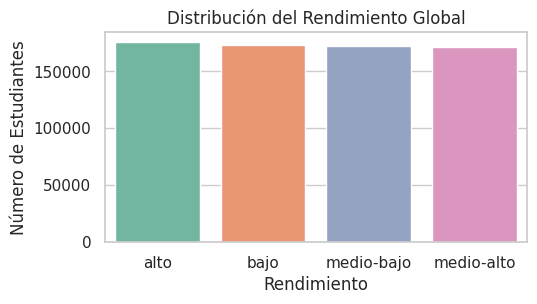

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Histograma 1: Distribución del rendimiento global
plt.subplot(2, 2, 1)
sns.countplot(data=z, x='RENDIMIENTO_GLOBAL', order=z['RENDIMIENTO_GLOBAL'].value_counts().index, palette='Set2')
plt.title('Distribución del Rendimiento Global')
plt.xlabel('Rendimiento')
plt.ylabel('Número de Estudiantes')


Distribución equitativa: Todas las categorías parecen tener una cantidad similar de estudiantes, rondando los 150,000 en cada grupo. Esto sugiere una distribución balanceada del rendimiento académico.


<ipython-input-19-51ea55494938>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=z, y='ESTU_VALORMATRICULAUNIVERSIDAD', order=z['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts().index, palette='coolwarm')


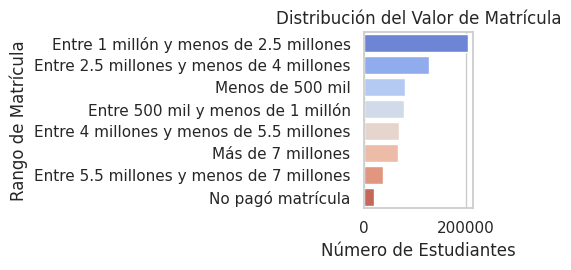

In [19]:
# Histograma 4: Valor de matrícula
plt.subplot(2, 2, 4)
sns.countplot(data=z, y='ESTU_VALORMATRICULAUNIVERSIDAD', order=z['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts().index, palette='coolwarm')
plt.title('Distribución del Valor de Matrícula')
plt.xlabel('Número de Estudiantes')
plt.ylabel('Rango de Matrícula')

plt.tight_layout()
plt.show()

**Mayor concentración de estudiantes:** La mayoría de los estudiantes se encuentran en el rango de entre 1 millón y menos de 2.5 millones, lo que indica que este es el valor más común de matrícula.
**Menor presencia en rangos altos:** Los grupos que pagan más de 5.5 millones tienen una cantidad significativamente menor de estudiantes, lo que sugiere que son menos accesibles o comunes.
**Variabilidad en los costos:** Hay una amplia distribución de valores, con rangos que van desde menos de 500 mil hasta más de 7 millones, lo que refleja la diversidad en costos según instituciones o programas educativos.


In [20]:
# Mostrar las primeras filas de una columna específica
print("Primeras filas de FAMI_EDUCACIONMADRE:")
print(z['FAMI_EDUCACIONMADRE'].head())

# Ver los valores únicos de la variable RENDIMIENTO_GLOBAL
print("\nCategorías únicas en RENDIMIENTO_GLOBAL:")
print(z['RENDIMIENTO_GLOBAL'].unique())

# Contar cuántos estudiantes tienen computador
print("\nCantidad de estudiantes que tienen computador:")
print(z['FAMI_TIENECOMPUTADOR'].value_counts())

# Filtrar los estudiantes con rendimiento 'alto'
print("\nFiltrar estudiantes con RENDIMIENTO_GLOBAL 'alto':")
print(z[z['RENDIMIENTO_GLOBAL'] == 'alto'].head())

# Mostrar varias columnas al mismo tiempo
print("\nMostrar columnas ESTU_PRGM_ACADEMICO y RENDIMIENTO_GLOBAL:")
print(z[['ESTU_PRGM_ACADEMICO', 'RENDIMIENTO_GLOBAL']].head())

# Agrupar por FAMI_EDUCACIONPADRE y contar tipos de rendimiento
print("\nConteo de RENDIMIENTO_GLOBAL por nivel educativo del padre:")
print(z.groupby('FAMI_EDUCACIONPADRE')['RENDIMIENTO_GLOBAL'].value_counts())


Primeras filas de FAMI_EDUCACIONMADRE:
0                             Postgrado
1      Técnica o tecnológica incompleta
2    Secundaria (Bachillerato) completa
3    Secundaria (Bachillerato) completa
4                     Primaria completa
Name: FAMI_EDUCACIONMADRE, dtype: category
Categories (12, object): ['Educación profesional completa', 'Educación profesional incompleta', 'Ninguno',
                          'No Aplica', ..., 'Secundaria (Bachillerato) completa',
                          'Secundaria (Bachillerato) incompleta', 'Técnica o tecnológica completa',
                          'Técnica o tecnológica incompleta']

Categorías únicas en RENDIMIENTO_GLOBAL:
['medio-alto', 'bajo', 'alto', 'medio-bajo']
Categories (4, object): ['alto', 'bajo', 'medio-alto', 'medio-bajo']

Cantidad de estudiantes que tienen computador:
FAMI_TIENECOMPUTADOR
Si    597670
No     56727
Name: count, dtype: int64

Filtrar estudiantes con RENDIMIENTO_GLOBAL 'alto':
        ID  PERIODO         ESTU_PRGM_

<ipython-input-20-30a1f12603c4>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(z.groupby('FAMI_EDUCACIONPADRE')['RENDIMIENTO_GLOBAL'].value_counts())


En el análisis exploratorio se observó que el rendimiento académico global de los estudiantes varía según su programa académico y el nivel educativo del padre. Por ejemplo, los estudiantes del programa de Mercadeo y Publicidad tienden a tener un rendimiento global bajo, mientras que los de Administración de Empresas presentan mayoritariamente un rendimiento alto, y los de Psicología se concentran en un rendimiento medio-bajo. Adicionalmente, al agrupar los datos por el nivel educativo del padre, se evidencia que aquellos con estudios de postgrado o educación profesional completa tienen hijos con mayor proporción de rendimientos altos, mientras que niveles educativos como primaria incompleta o “ninguno” se asocian principalmente con rendimientos bajos y medio-bajos. Este patrón sugiere una posible relación positiva entre el nivel educativo del padre y el rendimiento académico de sus hijos.

REALIZAREMOS UN MODELO UTILIZANDO LAS TRES COLUMNAS (QUE SERAN LOS FACTORES MAS IMPORTANTES A TENER EN CUENTA PARA LA PREDICCIÓN) Y DADAS ESTAS 3 COLUMNAS VAMOS A PREDECIR LA COLUMNA RENDIMIENTO GLOBAL
LAS TRES COLUMNAS SERÁN :


1.   ESTU_VALORMATRICULAUNIVERSIDAD
2.   ESTU_PRGM_DEPARTAMENTO
3.   FAMI_EDUCACIONPADRE



In [21]:
z = z[['FAMI_EDUCACIONPADRE', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PRGM_ACADEMICO' , 'RENDIMIENTO_GLOBAL']]
z.head()

,FAMI_EDUCACIONPADRE,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PRGM_ACADEMICO,RENDIMIENTO_GLOBAL
0,Técnica o tecnológica incompleta,Entre 5.5 millones y menos de 7 millones,ENFERMERIA,medio-alto
1,Técnica o tecnológica completa,Entre 2.5 millones y menos de 4 millones,DERECHO,bajo
2,Secundaria (Bachillerato) completa,Entre 2.5 millones y menos de 4 millones,MERCADEO Y PUBLICIDAD,bajo
3,No sabe,Entre 4 millones y menos de 5.5 millones,ADMINISTRACION DE EMPRESAS,alto
4,Primaria completa,Entre 2.5 millones y menos de 4 millones,PSICOLOGIA,medio-bajo


<Axes: xlabel='FAMI_EDUCACIONPADRE'>

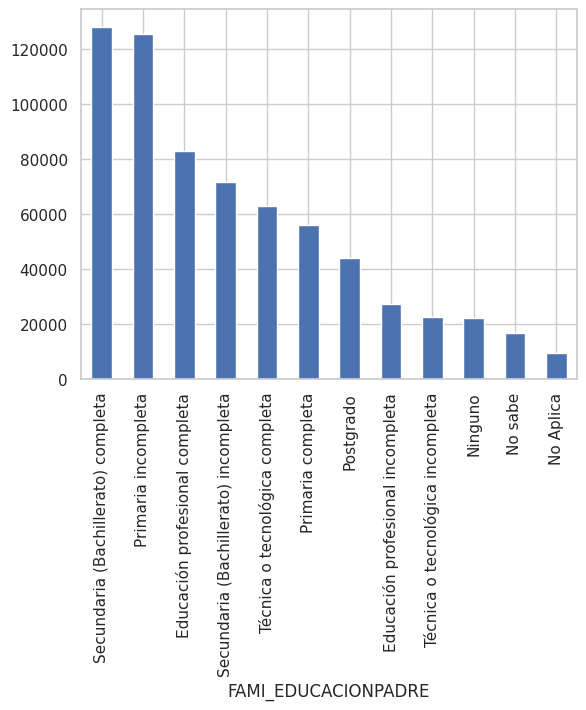

In [22]:
z.FAMI_EDUCACIONPADRE.value_counts().plot(kind='bar')


<Axes: xlabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

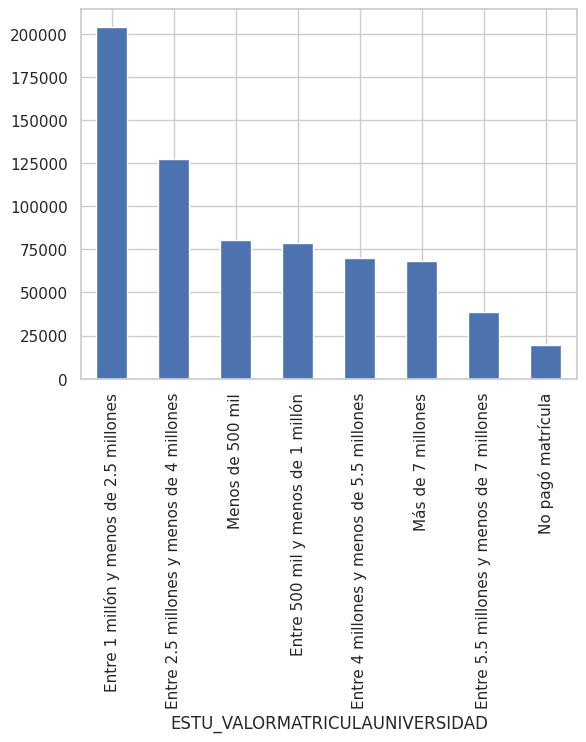

In [ ]:
z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_PRGM_ACADEMICO'>

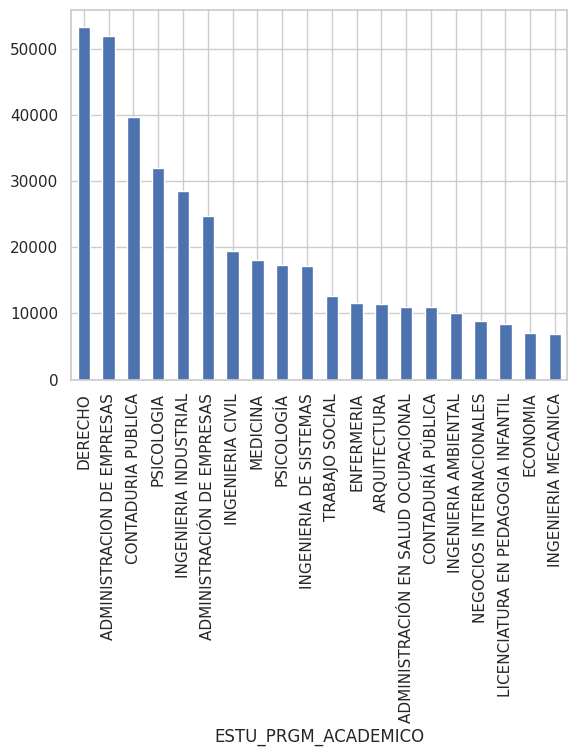

In [23]:
z.ESTU_PRGM_ACADEMICO.value_counts().head(20).plot(kind='bar')

INSPECCIÓN VISUAL ACERCA DEL COMPORTAMIENTO QUE TIENE LA VARIABLE FRENTE A LA COLUMNA A PREDECIR.

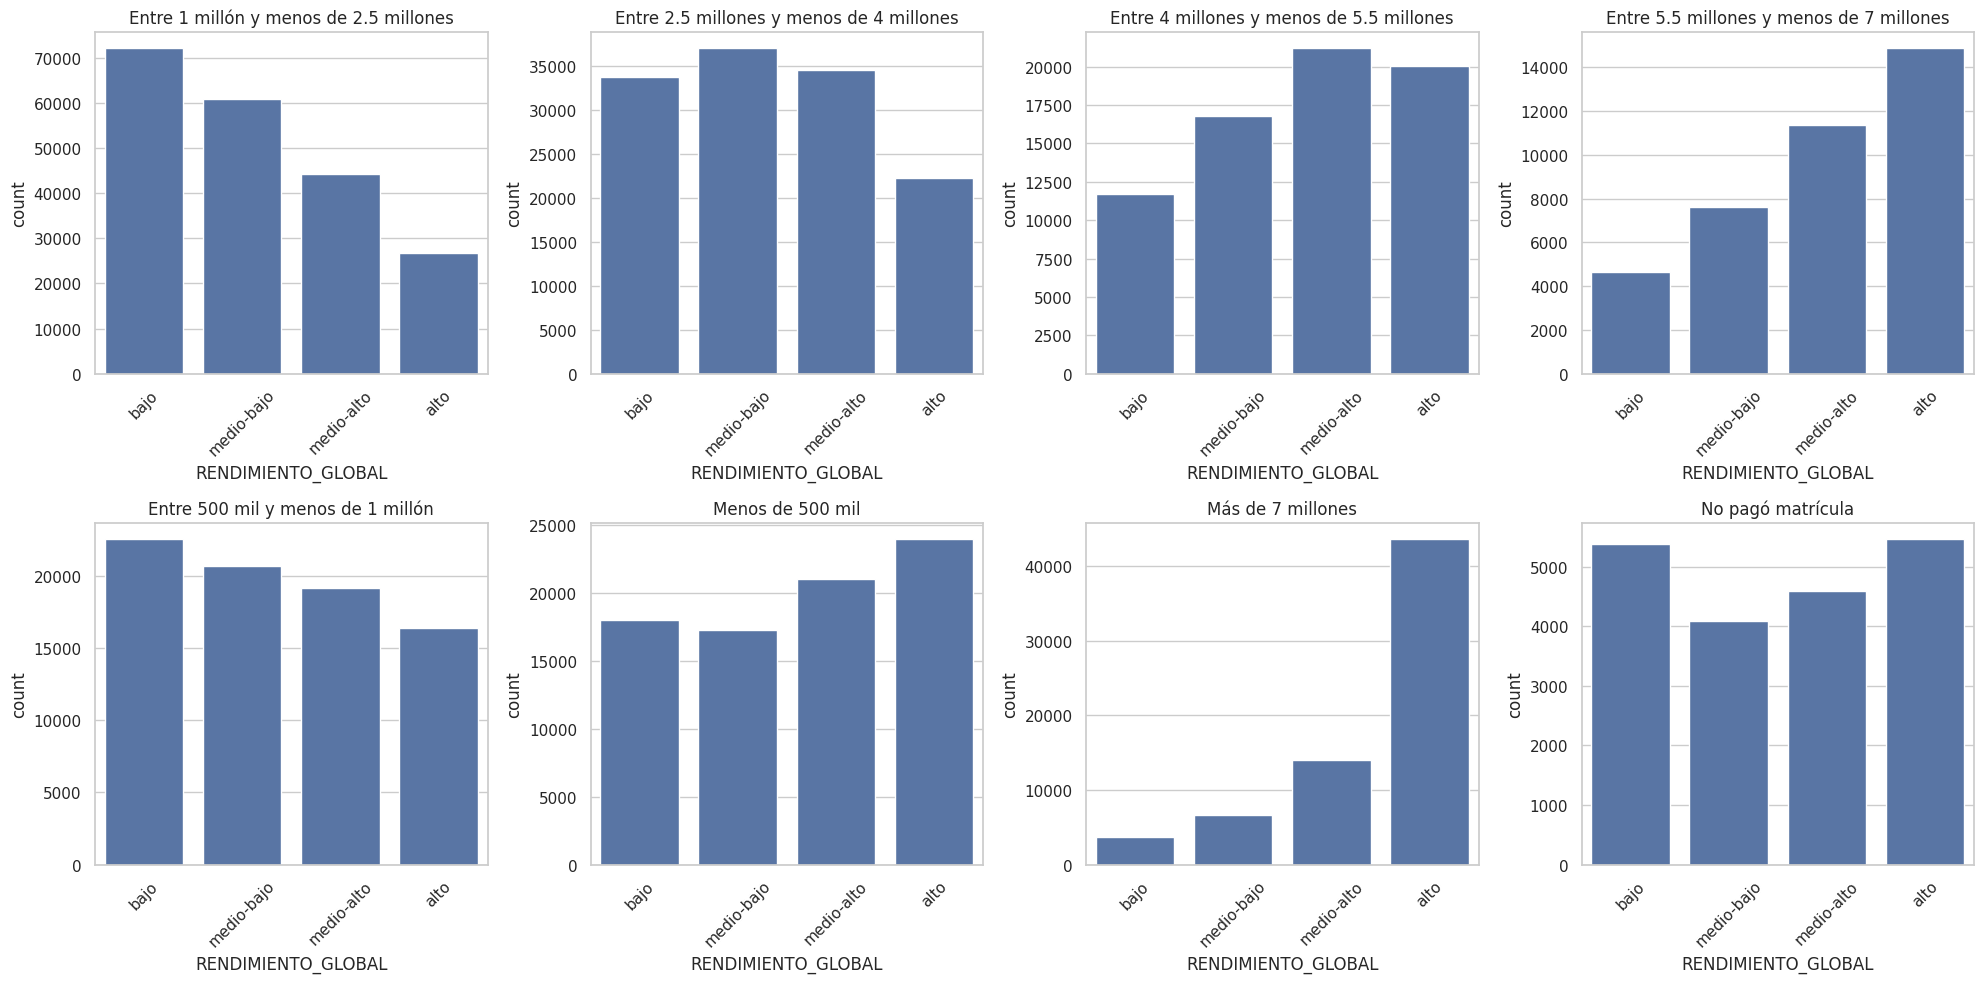

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar o reemplazar los NaN temporalmente para graficar
categorias = sorted(z['ESTU_VALORMATRICULAUNIVERSIDAD'].dropna().unique())

# Crear subplots
fig, axs = plt.subplots(nrows=(len(categorias) + 3) // 4, ncols=4, figsize=(20, 10))
axs = axs.flatten()

# Crear un gráfico por categoría
for i, categoria in enumerate(categorias):
    subset = z[z['ESTU_VALORMATRICULAUNIVERSIDAD'] == categoria]
    sns.countplot(data=subset, x='RENDIMIENTO_GLOBAL', ax=axs[i],
                  order=['bajo', 'medio-bajo', 'medio-alto', 'alto'])
    axs[i].set_title(categoria)
    axs[i].tick_params(axis='x', rotation=45)

# Ocultar subplots vacíos
for j in range(i+1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()


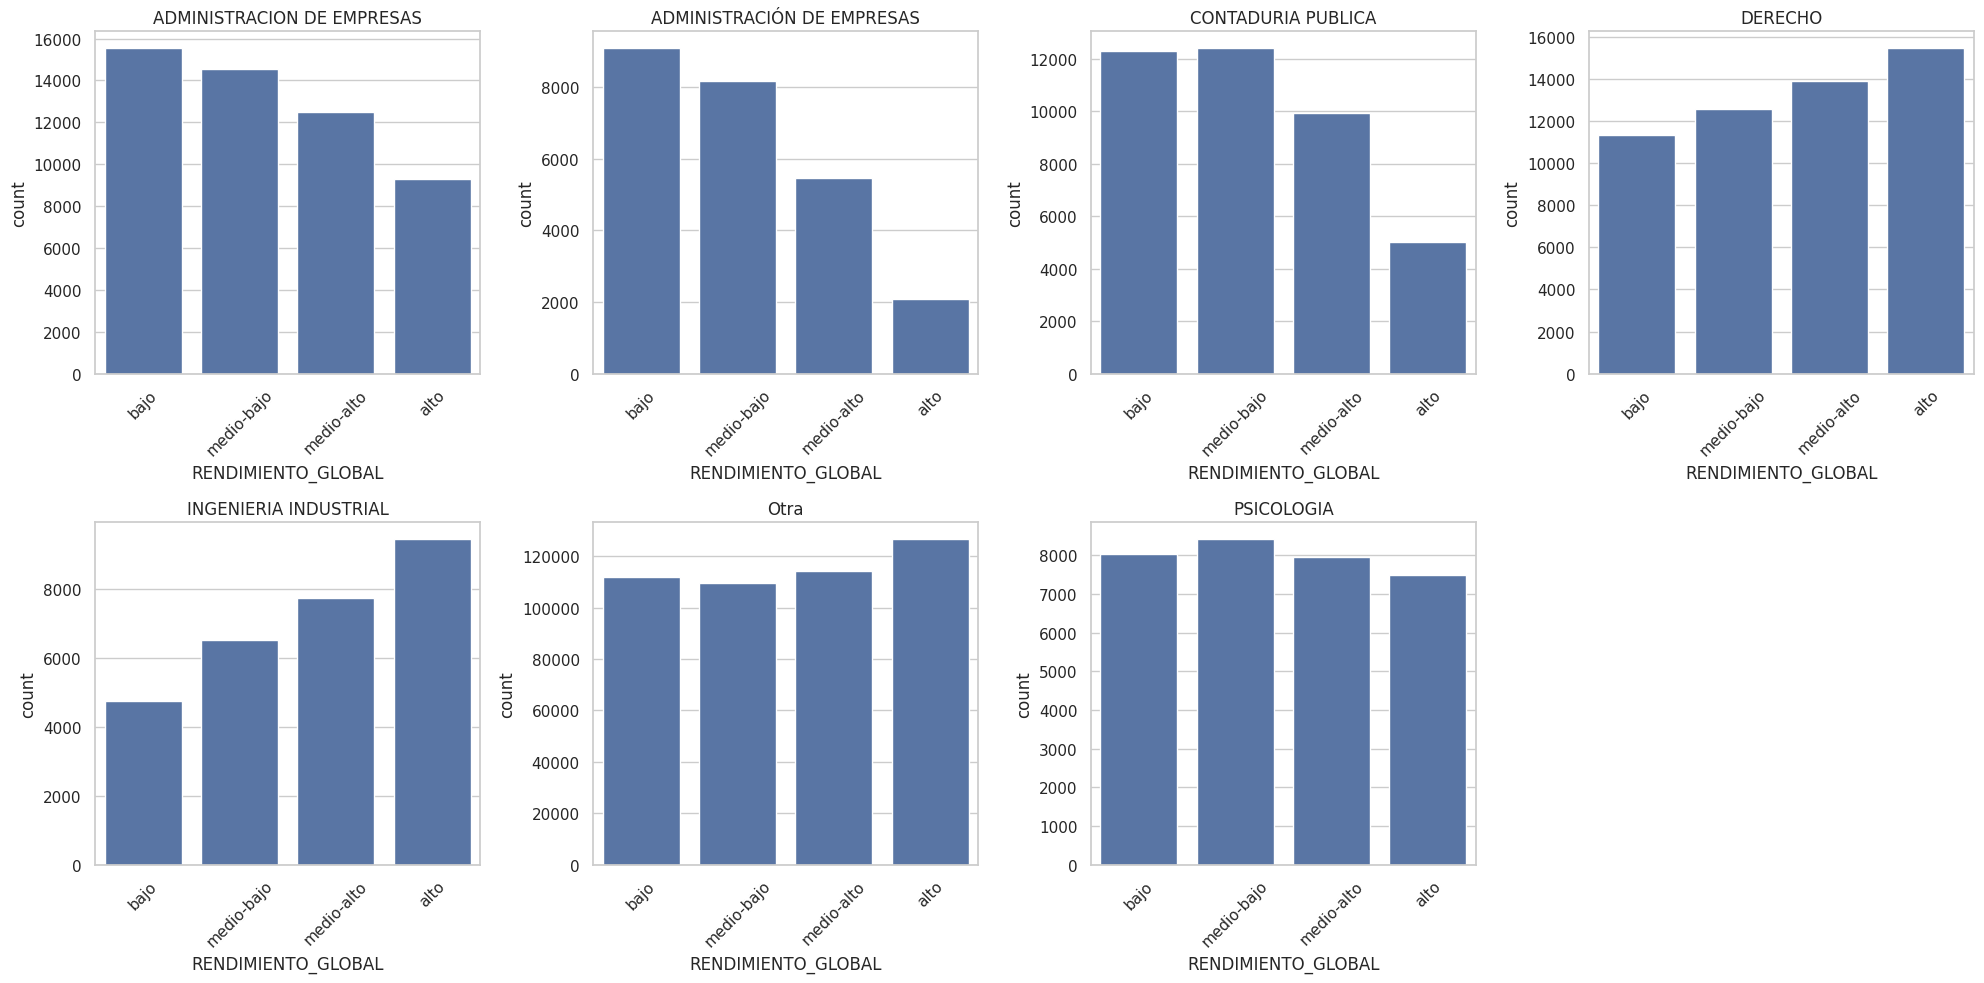

In [25]:
# Agregar categoría 'No sabe' si hace falta
if z['ESTU_PRGM_ACADEMICO'].dtype.name == 'category':
    if 'No sabe' not in z['ESTU_PRGM_ACADEMICO'].cat.categories:
        z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].cat.add_categories('No sabe')

z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].fillna('No sabe')

# Obtener las 6 categorías más frecuentes
top_categorias = z['ESTU_PRGM_ACADEMICO'].value_counts().nlargest(6).index

# Crear nueva columna con 'top' categorías y agrupar el resto en 'Otra'
z['ESTU_PRGM_ACADEMICO_simplificado'] = z['ESTU_PRGM_ACADEMICO'].apply(
    lambda x: x if x in top_categorias else 'Otra'
)

# Gráfico con las categorías más comunes + 'Otra'
categorias = sorted(z['ESTU_PRGM_ACADEMICO_simplificado'].unique())

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

for i, categoria in enumerate(categorias):
    subset = z[z['ESTU_PRGM_ACADEMICO_simplificado'] == categoria]
    sns.countplot(data=subset, x='RENDIMIENTO_GLOBAL', ax=axs[i],
                  order=['bajo', 'medio-bajo', 'medio-alto', 'alto'])
    axs[i].set_title(categoria)
    axs[i].tick_params(axis='x', rotation=45)

# Ocultar ejes vacíos
for j in range(i+1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()


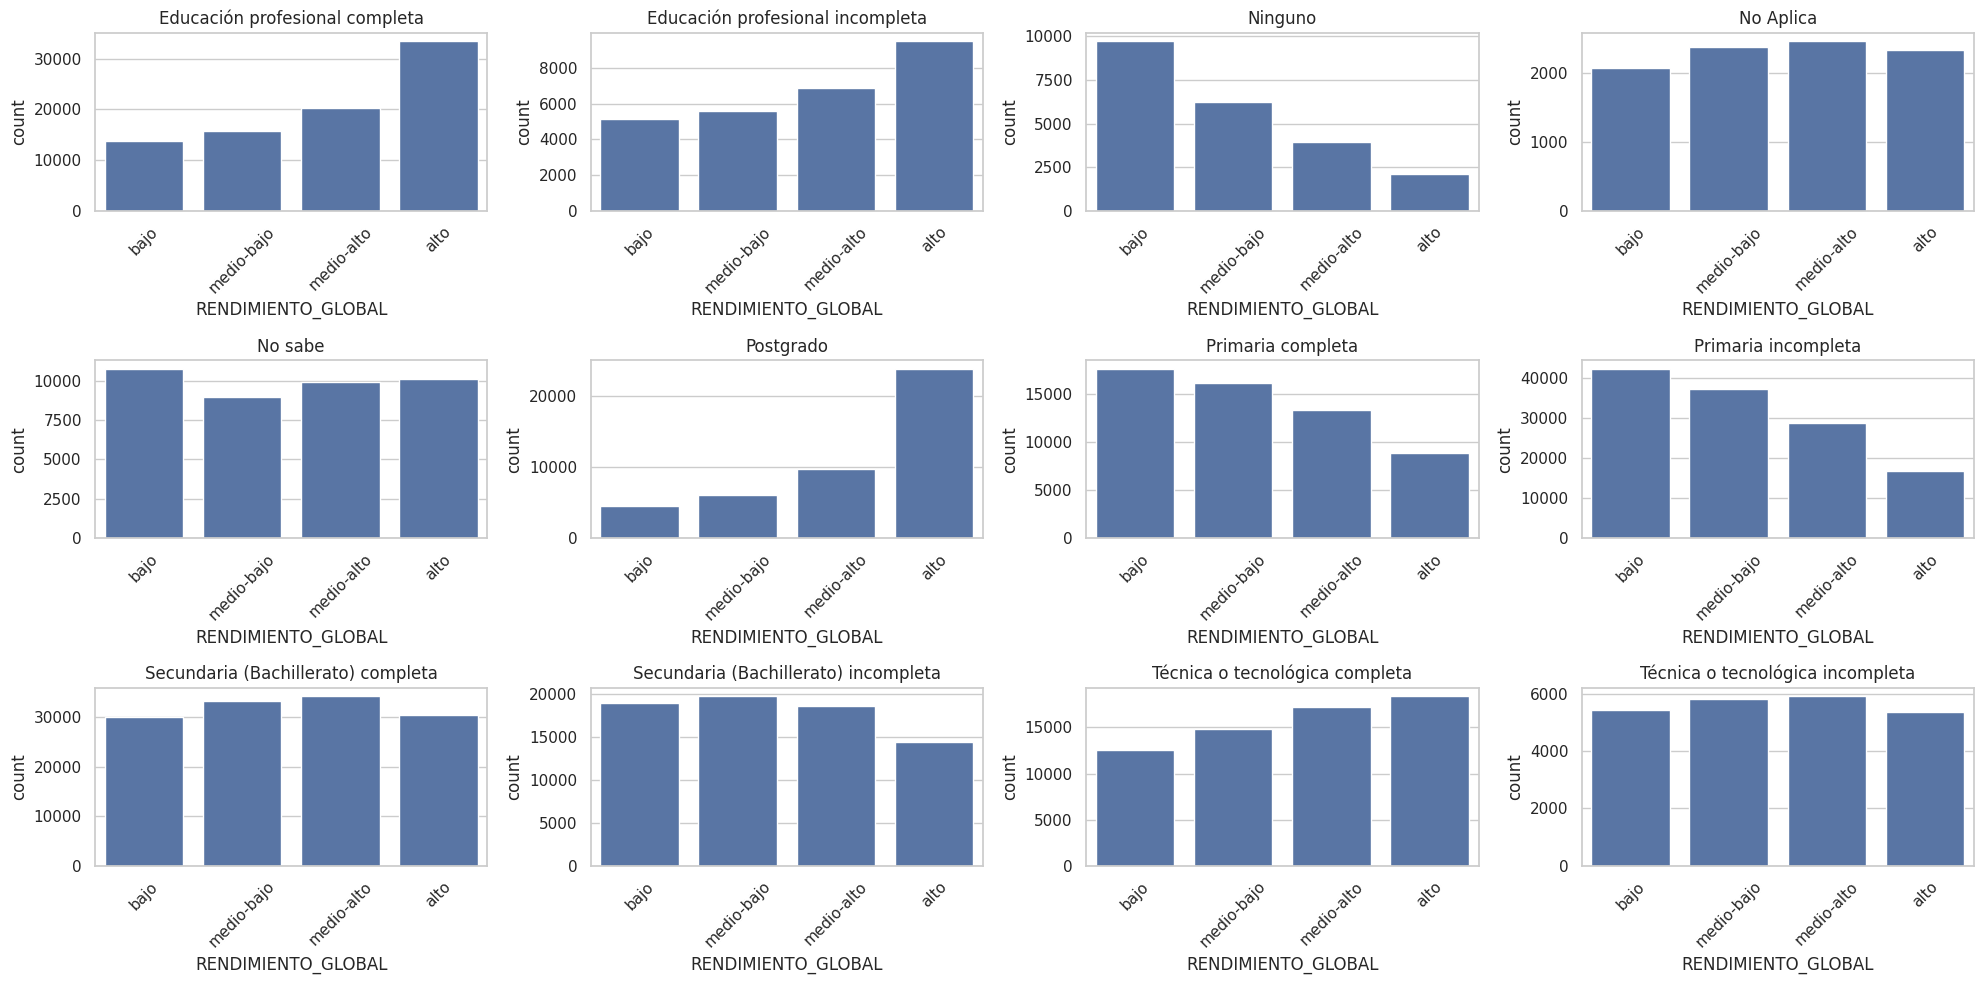

In [26]:
z['FAMI_EDUCACIONPADRE'] = z['FAMI_EDUCACIONPADRE'].fillna('No sabe')

categorias = sorted(z['FAMI_EDUCACIONPADRE'].unique())

fig, axs = plt.subplots(nrows=(len(categorias) + 3) // 4, ncols=4, figsize=(20, 10))
axs = axs.flatten()

for i, categoria in enumerate(categorias):
    subset = z[z['FAMI_EDUCACIONPADRE'] == categoria]
    sns.countplot(data=subset, x='RENDIMIENTO_GLOBAL', ax=axs[i],
                  order=['bajo', 'medio-bajo', 'medio-alto', 'alto'])
    axs[i].set_title(categoria)
    axs[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()


COMO VEMOS VARIABLES REPETIDAS DEBIDO A TILDES O DIFERENCIAS DE ESCRITURA VAMOS A NORMALIZAR CADA UNA DE LAS VARIABLES PARA INICIAR CON LA LIMPIEZA DE DATOS.

In [27]:
def limpiar_educacion_padre(texto):
    if pd.isna(texto): # Si el valor es nulo (NaN)
        return 'NO INFO' # Lo tratamos como 'NO INFO'
    texto = str(texto).strip().upper() # Quita espacios y pasa a mayúsculas
    if texto in ['NO SABE', 'NO APLICA']:
        return 'NO INFO'
    return texto


In [28]:
z['FAMI_EDUCACIONPADRE'] = z['FAMI_EDUCACIONPADRE'].apply(limpiar_educacion_padre)

print("\n--- FAMI_EDUCACIONPADRE después de la limpieza ---")
print(z['FAMI_EDUCACIONPADRE'].value_counts())


--- FAMI_EDUCACIONPADRE después de la limpieza ---
FAMI_EDUCACIONPADRE
SECUNDARIA (BACHILLERATO) COMPLETA      128289
PRIMARIA INCOMPLETA                     125675
EDUCACIÓN PROFESIONAL COMPLETA           83117
SECUNDARIA (BACHILLERATO) INCOMPLETA     71654
TÉCNICA O TECNOLÓGICA COMPLETA           62995
PRIMARIA COMPLETA                        55958
NO INFO                                  48999
POSTGRADO                                44169
EDUCACIÓN PROFESIONAL INCOMPLETA         27084
TÉCNICA O TECNOLÓGICA INCOMPLETA         22552
NINGUNO                                  22008
Name: count, dtype: int64


NORMALIZACION DE LA COLUMNA RENDIMIENTO GLOBAL

In [29]:
def limpiar_rendimiento(texto):
    if pd.isna(texto): # Si el valor es nulo (NaN)
        return np.nan # Puedes decidir dejarlo como NaN o asignarle un valor específico
    return str(texto).strip().upper() # Quita espacios y pasa a mayúsculas

z['RENDIMIENTO_GLOBAL'] = z['RENDIMIENTO_GLOBAL'].apply(limpiar_rendimiento)

# Luego, creamos el mapa de los valores limpios a números
mapa_rendimiento = {
    'ALTO': 3,
    'MEDIO-ALTO': 2,
    'MEDIO-BAJO': 1,
    'BAJO': 0
}

# Aplicamos el mapeo. Si hay un valor que no está en el mapa, se convertirá en NaN.
z['RENDIMIENTO_GLOBAL_NUMERICO'] = z['RENDIMIENTO_GLOBAL'].map(mapa_rendimiento)

print("\n--- RENDIMIENTO_GLOBAL_NUMERICO después de la limpieza y mapeo ---")
print(z['RENDIMIENTO_GLOBAL_NUMERICO'].value_counts(dropna=False)) # dropna=False para ver si hay NaN
# Puedes eliminar la columna original si ya no la necesitas:
# z = z.drop(columns=['RENDIMIENTO_GLOBAL'])


--- RENDIMIENTO_GLOBAL_NUMERICO después de la limpieza y mapeo ---
RENDIMIENTO_GLOBAL_NUMERICO
3    175619
0    172987
1    172275
2    171619
Name: count, dtype: int64


In [30]:
print("\n--- RENDIMIENTO_GLOBAL_NUMERICO después de la limpieza y mapeo ---")
print(z['RENDIMIENTO_GLOBAL_NUMERICO'].value_counts(dropna=False))


--- RENDIMIENTO_GLOBAL_NUMERICO después de la limpieza y mapeo ---
RENDIMIENTO_GLOBAL_NUMERICO
3    175619
0    172987
1    172275
2    171619
Name: count, dtype: int64


-- Normalización la columna ESTU_PRGM_ACADEMICO ---
# Esta es la que tenía muchos valores y acentos diferentes.Por este motivo es muy importante realizar la normalización.
# La dejaremos con las X categorías más comunes y el resto como 'OTRAS'.

In [33]:
import unicodedata
def limpiar_programa_academico(texto):
    if pd.isna(texto):
        return 'NO INFO'
    texto = str(texto).strip().upper()
    # Quitar tildes y caracteres especiales para unificar nombres
    texto = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')
    texto = ' '.join(texto.split()) # Quitar espacios extra


In [35]:
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].apply(limpiar_programa_academico)

print("\n--- ESTU_PRGM_ACADEMICO después de limpieza inicial ---")
print(z['ESTU_PRGM_ACADEMICO'].value_counts().head(20))


--- ESTU_PRGM_ACADEMICO después de limpieza inicial ---
ESTU_PRGM_ACADEMICO
NO INFO    692500
Name: count, dtype: int64


In [36]:
print(z.head())
print("\n--- Lista de todas las columnas en 'z' ---")
print(z.columns.tolist())

                  FAMI_EDUCACIONPADRE  \
0    TÉCNICA O TECNOLÓGICA INCOMPLETA   
1      TÉCNICA O TECNOLÓGICA COMPLETA   
2  SECUNDARIA (BACHILLERATO) COMPLETA   
3                             NO INFO   
4                   PRIMARIA COMPLETA   

             ESTU_VALORMATRICULAUNIVERSIDAD ESTU_PRGM_ACADEMICO  \
0  Entre 5.5 millones y menos de 7 millones             NO INFO   
1  Entre 2.5 millones y menos de 4 millones             NO INFO   
2  Entre 2.5 millones y menos de 4 millones             NO INFO   
3  Entre 4 millones y menos de 5.5 millones             NO INFO   
4  Entre 2.5 millones y menos de 4 millones             NO INFO   

  RENDIMIENTO_GLOBAL ESTU_PRGM_ACADEMICO_simplificado  \
0         MEDIO-ALTO                             Otra   
1               BAJO                          DERECHO   
2               BAJO                             Otra   
3               ALTO       ADMINISTRACION DE EMPRESAS   
4         MEDIO-BAJO                       PSICOLOGIA   

  RENDI

In [37]:
columnas_a_eliminar = [
    'ESTU_PRGM_ACADEMICO',
    'RENDIMIENTO_GLOBAL'
]

z.drop(columns=columnas_a_eliminar, inplace=True)

print("Columnas eliminadas exitosamente.")
print("\nNuevas columnas de tu DataFrame 'z':")
print(z.columns.tolist())

Columnas eliminadas exitosamente.

Nuevas columnas de tu DataFrame 'z':
['FAMI_EDUCACIONPADRE', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PRGM_ACADEMICO_simplificado', 'RENDIMIENTO_GLOBAL_NUMERICO']


In [38]:
# Lista de variables a limpiar
variables = [
    'FAMI_EDUCACIONPADRE',
    'ESTU_VALORMATRICULAUNIVERSIDAD',
    'ESTU_PRGM_ACADEMICO_simplificado',
]

# Reemplazo de NaN por 'no info'
for var in variables:
    if z[var].dtype.name == 'category':
        if 'no info' not in z[var].cat.categories:
            z[var] = z[var].cat.add_categories('no info')
    z[var] = z[var].fillna('no info')

# Verificar que ya no hay valores faltantes
[z[var].isna().sum() for var in variables]


[np.int64(0), np.int64(0), np.int64(0)]

LIMPIEZA DE LA VARIABLE EDUCAIÓN DEL PADRE

In [39]:
z = z.copy()
z.FAMI_EDUCACIONPADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in z.FAMI_EDUCACIONPADRE.values]

In [40]:
z.FAMI_EDUCACIONPADRE.value_counts()

,count
FAMI_EDUCACIONPADRE,
SECUNDARIA (BACHILLERATO) COMPLETA,128289
PRIMARIA INCOMPLETA,125675
EDUCACIÓN PROFESIONAL COMPLETA,83117
SECUNDARIA (BACHILLERATO) INCOMPLETA,71654
TÉCNICA O TECNOLÓGICA COMPLETA,62995
PRIMARIA COMPLETA,55958
NO INFO,48999
POSTGRADO,44169
EDUCACIÓN PROFESIONAL INCOMPLETA,27084


In [41]:
x = z.FAMI_EDUCACIONPADRE.values
FAMI_EDUCACIONPADRE_vals = sorted(np.unique(x))
FAMI_EDUCACIONPADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONPADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONPADRE_vals)}
FAMI_EDUCACIONPADRE_onehot_vals

{'EDUCACIÓN PROFESIONAL COMPLETA': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'EDUCACIÓN PROFESIONAL INCOMPLETA': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'NINGUNO': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'NO INFO': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'POSTGRADO': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'PRIMARIA COMPLETA': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'PRIMARIA INCOMPLETA': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'SECUNDARIA (BACHILLERATO) COMPLETA': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'SECUNDARIA (BACHILLERATO) INCOMPLETA': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'TÉCNICA O TECNOLÓGICA COMPLETA': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'TÉCNICA O TECNOLÓGICA INCOMPLETA': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [42]:
FAMI_EDUCACIONPADRE_onehot_enc = np.r_[[FAMI_EDUCACIONPADRE_onehot_vals[i] for i in z.FAMI_EDUCACIONPADRE]]
FAMI_EDUCACIONPADRE_onehot_enc

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
FAMI_EDUCACIONPADRE_df = pd.DataFrame(FAMI_EDUCACIONPADRE_onehot_enc, columns=[f"FAMI_EDUCACIONPADRE__{v}" for v in FAMI_EDUCACIONPADRE_onehot_vals])
FAMI_EDUCACIONPADRE_df

,FAMI_EDUCACIONPADRE__EDUCACIÓN PROFESIONAL COMPLETA,FAMI_EDUCACIONPADRE__EDUCACIÓN PROFESIONAL INCOMPLETA,FAMI_EDUCACIONPADRE__NINGUNO,FAMI_EDUCACIONPADRE__NO INFO,FAMI_EDUCACIONPADRE__POSTGRADO,FAMI_EDUCACIONPADRE__PRIMARIA COMPLETA,FAMI_EDUCACIONPADRE__PRIMARIA INCOMPLETA,FAMI_EDUCACIONPADRE__SECUNDARIA (BACHILLERATO) COMPLETA,FAMI_EDUCACIONPADRE__SECUNDARIA (BACHILLERATO) INCOMPLETA,FAMI_EDUCACIONPADRE__TÉCNICA O TECNOLÓGICA COMPLETA,FAMI_EDUCACIONPADRE__TÉCNICA O TECNOLÓGICA INCOMPLETA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [44]:
z = pd.concat([FAMI_EDUCACIONPADRE_df, z], axis=1).drop('FAMI_EDUCACIONPADRE', axis=1)
z.shape

(692500, 14)

In [45]:
z.head()

,FAMI_EDUCACIONPADRE__EDUCACIÓN PROFESIONAL COMPLETA,FAMI_EDUCACIONPADRE__EDUCACIÓN PROFESIONAL INCOMPLETA,FAMI_EDUCACIONPADRE__NINGUNO,FAMI_EDUCACIONPADRE__NO INFO,FAMI_EDUCACIONPADRE__POSTGRADO,FAMI_EDUCACIONPADRE__PRIMARIA COMPLETA,FAMI_EDUCACIONPADRE__PRIMARIA INCOMPLETA,FAMI_EDUCACIONPADRE__SECUNDARIA (BACHILLERATO) COMPLETA,FAMI_EDUCACIONPADRE__SECUNDARIA (BACHILLERATO) INCOMPLETA,FAMI_EDUCACIONPADRE__TÉCNICA O TECNOLÓGICA COMPLETA,FAMI_EDUCACIONPADRE__TÉCNICA O TECNOLÓGICA INCOMPLETA,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PRGM_ACADEMICO_simplificado,RENDIMIENTO_GLOBAL_NUMERICO
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Entre 5.5 millones y menos de 7 millones,Otra,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Entre 2.5 millones y menos de 4 millones,DERECHO,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Entre 2.5 millones y menos de 4 millones,Otra,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entre 4 millones y menos de 5.5 millones,ADMINISTRACION DE EMPRESAS,3
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Entre 2.5 millones y menos de 4 millones,PSICOLOGIA,1


In [46]:

# Codificación one-hot
x = z.ESTU_VALORMATRICULAUNIVERSIDAD.values
ESTU_VALORMATRICULAUNIVERSIDAD_vals = sorted(np.unique(x))
ESTU_VALORMATRICULAUNIVERSIDAD_onehot_vals = {val: np.eye(len(ESTU_VALORMATRICULAUNIVERSIDAD_vals))[i] for i, val in enumerate(ESTU_VALORMATRICULAUNIVERSIDAD_vals)}

ESTU_VALORMATRICULAUNIVERSIDAD_onehot_enc = np.r_[[ESTU_VALORMATRICULAUNIVERSIDAD_onehot_vals[i] for i in z.ESTU_VALORMATRICULAUNIVERSIDAD]]

# DataFrame con columnas codificadas
ESTU_VALORMATRICULAUNIVERSIDAD_df = pd.DataFrame(
    ESTU_VALORMATRICULAUNIVERSIDAD_onehot_enc,
    columns=[f"ESTU_VALORMATRICULAUNIVERSIDAD__{v}" for v in ESTU_VALORMATRICULAUNIVERSIDAD_onehot_vals]
)

# Concatenar y eliminar la variable original
z = pd.concat([ESTU_VALORMATRICULAUNIVERSIDAD_df, z], axis=1).drop('ESTU_VALORMATRICULAUNIVERSIDAD', axis=1)

# Verifica resultado
z.shape
z.head()


,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 1 millón y menos de 2.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 2.5 millones y menos de 4 millones,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 4 millones y menos de 5.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 5.5 millones y menos de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 500 mil y menos de 1 millón,ESTU_VALORMATRICULAUNIVERSIDAD__Menos de 500 mil,ESTU_VALORMATRICULAUNIVERSIDAD__Más de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD__No pagó matrícula,ESTU_VALORMATRICULAUNIVERSIDAD__no info,FAMI_EDUCACIONPADRE__EDUCACIÓN PROFESIONAL COMPLETA,...,FAMI_EDUCACIONPADRE__NO INFO,FAMI_EDUCACIONPADRE__POSTGRADO,FAMI_EDUCACIONPADRE__PRIMARIA COMPLETA,FAMI_EDUCACIONPADRE__PRIMARIA INCOMPLETA,FAMI_EDUCACIONPADRE__SECUNDARIA (BACHILLERATO) COMPLETA,FAMI_EDUCACIONPADRE__SECUNDARIA (BACHILLERATO) INCOMPLETA,FAMI_EDUCACIONPADRE__TÉCNICA O TECNOLÓGICA COMPLETA,FAMI_EDUCACIONPADRE__TÉCNICA O TECNOLÓGICA INCOMPLETA,ESTU_PRGM_ACADEMICO_simplificado,RENDIMIENTO_GLOBAL_NUMERICO
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Otra,2
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,DERECHO,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Otra,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADMINISTRACION DE EMPRESAS,3
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,PSICOLOGIA,1


In [47]:

z.head()


,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 1 millón y menos de 2.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 2.5 millones y menos de 4 millones,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 4 millones y menos de 5.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 5.5 millones y menos de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 500 mil y menos de 1 millón,ESTU_VALORMATRICULAUNIVERSIDAD__Menos de 500 mil,ESTU_VALORMATRICULAUNIVERSIDAD__Más de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD__No pagó matrícula,ESTU_VALORMATRICULAUNIVERSIDAD__no info,FAMI_EDUCACIONPADRE__EDUCACIÓN PROFESIONAL COMPLETA,...,FAMI_EDUCACIONPADRE__NO INFO,FAMI_EDUCACIONPADRE__POSTGRADO,FAMI_EDUCACIONPADRE__PRIMARIA COMPLETA,FAMI_EDUCACIONPADRE__PRIMARIA INCOMPLETA,FAMI_EDUCACIONPADRE__SECUNDARIA (BACHILLERATO) COMPLETA,FAMI_EDUCACIONPADRE__SECUNDARIA (BACHILLERATO) INCOMPLETA,FAMI_EDUCACIONPADRE__TÉCNICA O TECNOLÓGICA COMPLETA,FAMI_EDUCACIONPADRE__TÉCNICA O TECNOLÓGICA INCOMPLETA,ESTU_PRGM_ACADEMICO_simplificado,RENDIMIENTO_GLOBAL_NUMERICO
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Otra,2
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,DERECHO,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Otra,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADMINISTRACION DE EMPRESAS,3
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,PSICOLOGIA,1


In [ ]:
print('ESTU_PRGM_ACADEMICO_simplificado' in z.columns)
print(z.columns.tolist())


False
['ESTU_PRGM_ACADEMICO_simplificado__ADMINISTRACION DE EMPRESAS', 'ESTU_PRGM_ACADEMICO_simplificado__ADMINISTRACIÓN DE EMPRESAS', 'ESTU_PRGM_ACADEMICO_simplificado__CONTADURIA PUBLICA', 'ESTU_PRGM_ACADEMICO_simplificado__DERECHO', 'ESTU_PRGM_ACADEMICO_simplificado__INGENIERIA INDUSTRIAL', 'ESTU_PRGM_ACADEMICO_simplificado__Otra', 'ESTU_PRGM_ACADEMICO_simplificado__PSICOLOGIA', 'ESTU_VALORMATRICULAUNIVERSIDAD__Entre 1 millón y menos de 2.5 millones', 'ESTU_VALORMATRICULAUNIVERSIDAD__Entre 2.5 millones y menos de 4 millones', 'ESTU_VALORMATRICULAUNIVERSIDAD__Entre 4 millones y menos de 5.5 millones', 'ESTU_VALORMATRICULAUNIVERSIDAD__Entre 5.5 millones y menos de 7 millones', 'ESTU_VALORMATRICULAUNIVERSIDAD__Entre 500 mil y menos de 1 millón', 'ESTU_VALORMATRICULAUNIVERSIDAD__Menos de 500 mil', 'ESTU_VALORMATRICULAUNIVERSIDAD__Más de 7 millones', 'ESTU_VALORMATRICULAUNIVERSIDAD__No pagó matrícula', 'ESTU_VALORMATRICULAUNIVERSIDAD__no info', 'FAMI_EDUCACIONPADRE__Educación profesional

In [ ]:
import pandas as pd

# Suponiendo que 'z' es tu DataFrame

# 1. Define los nombres exactos de las columnas que quieres unir
col_sin_tilde = 'ESTU_PRGM_ACADEMICO_simplificado__ADMINISTRACION DE EMPRESAS'
col_con_tilde = 'ESTU_PRGM_ACADEMICO_simplificado__ADMINISTRACIÓN DE EMPRESAS'

# 2. Crea la nueva columna consolidada sumando las dos y convirtiendo a binario (0 o 1)
#    Esto asegura que si un estudiante tiene un 1 en cualquiera de las dos originales,
#    tendrá un 1 en la nueva columna.
#    .astype(bool) convierte cualquier valor no cero a True, y cero a False.
#    .astype(int) convierte True a 1 y False a 0.
z['ESTU_PRGM_ACADEMICO_simplificado__ADMINISTRACION_DE_EMPRESAS_CONSOLIDADO'] = \
    (z[col_sin_tilde] + z[col_con_tilde]).astype(bool).astype(int)

# 3. Elimina las dos columnas originales
z = z.drop(columns=[col_sin_tilde, col_con_tilde])

# Opcional: Verifica las primeras filas y las columnas del DataFrame
print(z.head())
print("\nColumnas restantes después de la consolidación:")
print(z.columns.tolist())

   ESTU_PRGM_ACADEMICO_simplificado__CONTADURIA PUBLICA  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   ESTU_PRGM_ACADEMICO_simplificado__DERECHO  \
0                                        0.0   
1                                        1.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   ESTU_PRGM_ACADEMICO_simplificado__INGENIERIA INDUSTRIAL  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                             

In [ ]:
z.head()


,ESTU_PRGM_ACADEMICO_simplificado__CONTADURIA PUBLICA,ESTU_PRGM_ACADEMICO_simplificado__DERECHO,ESTU_PRGM_ACADEMICO_simplificado__INGENIERIA INDUSTRIAL,ESTU_PRGM_ACADEMICO_simplificado__Otra,ESTU_PRGM_ACADEMICO_simplificado__PSICOLOGIA,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 1 millón y menos de 2.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 2.5 millones y menos de 4 millones,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 4 millones y menos de 5.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 5.5 millones y menos de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 500 mil y menos de 1 millón,...,FAMI_EDUCACIONPADRE__Postgrado,FAMI_EDUCACIONPADRE__Primaria completa,FAMI_EDUCACIONPADRE__Primaria incompleta,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE__Técnica o tecnológica completa,FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE__no info,RENDIMIENTO_GLOBAL,ESTU_PRGM_ACADEMICO_simplificado__ADMINISTRACION_DE_EMPRESAS_CONSOLIDADO
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,medio-alto,0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,bajo,0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,bajo,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,alto,1
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,medio-bajo,0


In [ ]:
print(z.columns.tolist())

['ESTU_PRGM_ACADEMICO_simplificado__CONTADURIA PUBLICA', 'ESTU_PRGM_ACADEMICO_simplificado__DERECHO', 'ESTU_PRGM_ACADEMICO_simplificado__INGENIERIA INDUSTRIAL', 'ESTU_PRGM_ACADEMICO_simplificado__Otra', 'ESTU_PRGM_ACADEMICO_simplificado__PSICOLOGIA', 'ESTU_VALORMATRICULAUNIVERSIDAD__Entre 1 millón y menos de 2.5 millones', 'ESTU_VALORMATRICULAUNIVERSIDAD__Entre 2.5 millones y menos de 4 millones', 'ESTU_VALORMATRICULAUNIVERSIDAD__Entre 4 millones y menos de 5.5 millones', 'ESTU_VALORMATRICULAUNIVERSIDAD__Entre 5.5 millones y menos de 7 millones', 'ESTU_VALORMATRICULAUNIVERSIDAD__Entre 500 mil y menos de 1 millón', 'ESTU_VALORMATRICULAUNIVERSIDAD__Menos de 500 mil', 'ESTU_VALORMATRICULAUNIVERSIDAD__Más de 7 millones', 'ESTU_VALORMATRICULAUNIVERSIDAD__No pagó matrícula', 'ESTU_VALORMATRICULAUNIVERSIDAD__no info', 'FAMI_EDUCACIONPADRE__Educación profesional completa', 'FAMI_EDUCACIONPADRE__Educación profesional incompleta', 'FAMI_EDUCACIONPADRE__Ninguno', 'FAMI_EDUCACIONPADRE__Postgrado',

In [ ]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
z[y_col] = [rmap[i] for i in z[y_col]]


KeyError: 2

In [ ]:
z.head()

,ESTU_PRGM_ACADEMICO_simplificado__CONTADURIA PUBLICA,ESTU_PRGM_ACADEMICO_simplificado__DERECHO,ESTU_PRGM_ACADEMICO_simplificado__INGENIERIA INDUSTRIAL,ESTU_PRGM_ACADEMICO_simplificado__Otra,ESTU_PRGM_ACADEMICO_simplificado__PSICOLOGIA,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 1 millón y menos de 2.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 2.5 millones y menos de 4 millones,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 4 millones y menos de 5.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 5.5 millones y menos de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD__Entre 500 mil y menos de 1 millón,...,FAMI_EDUCACIONPADRE__Postgrado,FAMI_EDUCACIONPADRE__Primaria completa,FAMI_EDUCACIONPADRE__Primaria incompleta,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE__Técnica o tecnológica completa,FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE__no info,RENDIMIENTO_GLOBAL,ESTU_PRGM_ACADEMICO_simplificado__ADMINISTRACION_DE_EMPRESAS_CONSOLIDADO
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
